In [8]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from statsmodels.tsa.vector_ar.var_model import VAR


In [9]:
data_df = pd.read_csv("Joined_data.csv",  delimiter=',')

C:\Users\imypo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
data_df.head()

,Unnamed: 0,Date,AverageTemperature,AverageTemperatureUncertainty,COUNTRY,YEAR,MONTH,CAUSE_MODE,EQ_MAGNI_MEAN,ID_FIRST,...,ECLIPSE_TYPE,MAGNITUD,LATITUDE_y,LONGITUDE_y,DURATION_y,EVENT_y,DATE_STRIN,PLANET_POSITION,Lunar_Eclipse,Solar_Eclipse
0,0,1855-05-01,7.152,1.296,Chile,1855,5,NaN,NaN,NaN,...,P,0.7624,62.9N,16.6E,NaN,solar_eclipse,NaN,NaN,1,1
1,1,1855-06-01,4.257,1.641,Chile,1855,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2,1855-07-01,4.113,1.313,Chile,1855,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,3,1855-08-01,5.508,1.168,Chile,1855,8,Earthquake,0.0,847.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,4,1855-09-01,6.684,1.153,Chile,1855,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [11]:
data_df.columns

Index(['Unnamed: 0', 'Date', 'AverageTemperature',
       'AverageTemperatureUncertainty', 'COUNTRY', 'YEAR', 'MONTH',
       'CAUSE_MODE', 'EQ_MAGNI_MEAN', 'ID_FIRST', 'DEATHS_MEAN', 'DEATHS_MAX',
       'DEATHS_STD', 'DATE_FIRST', 'Event_Tsunami', 'Event_Earthquake',
       'DATE_STRIN_x', 'LATITUDE_x', 'LONGITUDE_x', 'PENUMBRAL',
       'PARTIAL ECLIPSE', 'DURATION_x', 'EVENT_x', 'DATE_STRIN_y',
       'ECLIPSE_TYPE', 'MAGNITUD', 'LATITUDE_y', 'LONGITUDE_y', 'DURATION_y',
       'EVENT_y', 'DATE_STRIN', 'PLANET_POSITION', 'Lunar_Eclipse',
       'Solar_Eclipse'],
      dtype='object')

In [14]:
data_df.index = pd.to_datetime(data_df['Date'], format='%Y-%m-%d')
#data_df


In [37]:
# Build my model for one country
#mdata.COUNTRY.unique()
mdata = data_df[data_df.COUNTRY=="Japan"]
mdata

,Unnamed: 0,Date,AverageTemperature,AverageTemperatureUncertainty,COUNTRY,YEAR,MONTH,CAUSE_MODE,EQ_MAGNI_MEAN,ID_FIRST,...,ECLIPSE_TYPE,MAGNITUD,LATITUDE_y,LONGITUDE_y,DURATION_y,EVENT_y,DATE_STRIN,PLANET_POSITION,Lunar_Eclipse,Solar_Eclipse
Date,,,,,,,,,,,,,,,,,,,,,
1841-01-01,4289,1841-01-01,-1.100,2.228,Japan,1841,1,NaN,NaN,NaN,...,P,0.0316,63.1S,56.6E,NaN,solar_eclipse,NaN,NaN,0,1
1841-02-01,4290,1841-02-01,-0.079,1.836,Japan,1841,2,NaN,NaN,NaN,...,P,0.2095,61.5N,52.4W,NaN,solar_eclipse,NaN,NaN,1,1
1841-03-01,4291,1841-03-01,2.680,2.221,Japan,1841,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1841-04-01,4292,1841-04-01,8.400,2.067,Japan,1841,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1841-05-01,4293,1841-05-01,13.796,1.759,Japan,1841,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-05-01,6431,2013-05-01,15.256,0.235,Japan,2013,5,NaN,NaN,NaN,...,A,0.9544,2.2N,175.5E,06m03s,solar_eclipse,NaN,NaN,1,1
2013-06-01,6432,2013-06-01,19.961,0.380,Japan,2013,6,,0.0,25724.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2013-07-01,6433,2013-07-01,24.286,0.369,Japan,2013,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [38]:
#drop Country column

mdata = mdata.drop("COUNTRY", axis=1)

mdata=mdata[mdata.YEAR>1900]

In [53]:
mdata

,Unnamed: 0,Date,AverageTemperature,AverageTemperatureUncertainty,YEAR,MONTH,CAUSE_MODE,EQ_MAGNI_MEAN,ID_FIRST,DEATHS_MEAN,...,ECLIPSE_TYPE,MAGNITUD,LATITUDE_y,LONGITUDE_y,DURATION_y,EVENT_y,DATE_STRIN,PLANET_POSITION,Lunar_Eclipse,Solar_Eclipse
Date,,,,,,,,,,,,,,,,,,,,,
1901-01-01,5010,1901-01-01,1.897,0.372,1901,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1901-02-01,5011,1901-02-01,0.414,0.603,1901,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1901-03-01,5012,1901-03-01,4.041,0.331,1901,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1901-04-01,5013,1901-04-01,10.688,0.566,1901,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1901-05-01,5014,1901-05-01,14.111,0.376,1901,5,NaN,NaN,NaN,NaN,...,T,1.0680,1.7S,98.4E,06m29s,solar_eclipse,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-05-01,6431,2013-05-01,15.256,0.235,2013,5,NaN,NaN,NaN,NaN,...,A,0.9544,2.2N,175.5E,06m03s,solar_eclipse,NaN,NaN,1,1
2013-06-01,6432,2013-06-01,19.961,0.380,2013,6,,0.0,25724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2013-07-01,6433,2013-07-01,24.286,0.369,2013,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


## Tsunami Magnitude PREDICTION

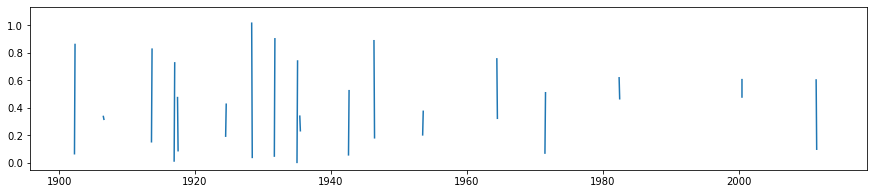

In [39]:

plt.figure(figsize= (15,3))
plt.plot(mdata.index, mdata['MAGNITUD'], );

ARMA uses a combination of past values and white noise in order to predict future values. Defining ARMA model using SARIMAX package. 

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

We define our input, in this case all data before 2010

In [41]:
y_train=mdata[mdata.YEAR<2010]

In [42]:
test=mdata[mdata.YEAR>=2010]

In [43]:
y = y_train['MAGNITUD']

Defining our model. To define an ARMA model with the SARIMAX class, we pass in the order parameters of (1, 0 ,1):

In [44]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

C:\Users\imypo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\imypo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


We then fit outr model:

In [45]:
ARMAmodel = ARMAmodel.fit()

Generate our predictions:

In [46]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

C:\Users\imypo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\imypo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


Plotting the results:

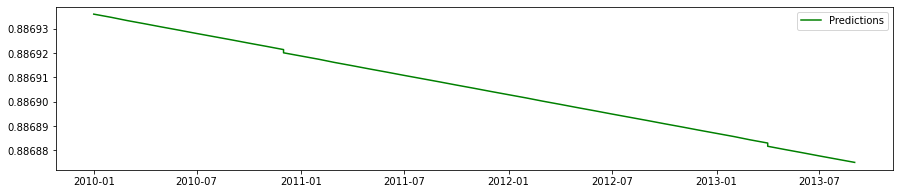

In [47]:
plt.figure(figsize= (15,3))
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend();

In [48]:
test['MAGNITUD'] = test['MAGNITUD'].replace(np.nan, 0)

<ipython-input-48-06e327edd246>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MAGNITUD'] = test['MAGNITUD'].replace(np.nan, 0)


In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["MAGNITUD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.8077053641889655


## Autoregressive Integrated Moving Average (ARIMA)

In [50]:
from statsmodels.tsa.arima.model import ARIMA

import numpy as np
from sklearn.metrics import mean_squared_error

An ARIMA task has three parameters. The first parameter corresponds to the lagging (past values), the second corresponds to differencing (this is what makes non-stationary data stationary), and the last parameter corresponds to the white noise (for modeling extreme weather events). 

Let’s define an ARIMA model with order parameters (2,2,2):

Converting Nan data to 0

In [51]:
test['MAGNITUD'] = test['MAGNITUD'].replace(np.nan, 0)
#test['AverageTemperature']


<ipython-input-51-2478813923f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MAGNITUD'] = test['MAGNITUD'].replace(np.nan, 0)


Cheching the error with RMSE:

In [52]:
arma_rmse = np.sqrt(mean_squared_error(test['MAGNITUD'].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.8077053641889655
